In [6]:
# Block 1: Imports and Load Data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load MNIST data from openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Use a smaller subset for faster execution (optional)
# X, _, y, _ = train_test_split(X, y, train_size=10000, random_state=42, stratify=y)

In [2]:
# Block 2: Preprocess and Split Data
X_flat = X # Data is already flattened
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 56000
Test set size: 14000


In [3]:
# Block 3: Train Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [4]:
# Block 4: Predict and Evaluate
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Gaussian Naive Bayes Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(class_report)

print("\nConfusion Matrix:")
print(conf_matrix)

Gaussian Naive Bayes Accuracy: 0.5260

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1381
           1       0.81      0.94      0.87      1575
           2       0.87      0.23      0.36      1398
           3       0.71      0.28      0.40      1428
           4       0.80      0.11      0.20      1365
           5       0.42      0.02      0.04      1263
           6       0.70      0.91      0.79      1375
           7       0.91      0.25      0.39      1459
           8       0.25      0.72      0.37      1365
           9       0.38      0.94      0.55      1391

    accuracy                           0.53     14000
   macro avg       0.66      0.52      0.47     14000
weighted avg       0.67      0.53      0.48     14000


Confusion Matrix:
[[1073    3    1    4    2    5   32    0  236   25]
 [   0 1485    4    1    1    4   18    2   43   17]
 [ 127   27  318  110   11   12  333    1  441   18]
 

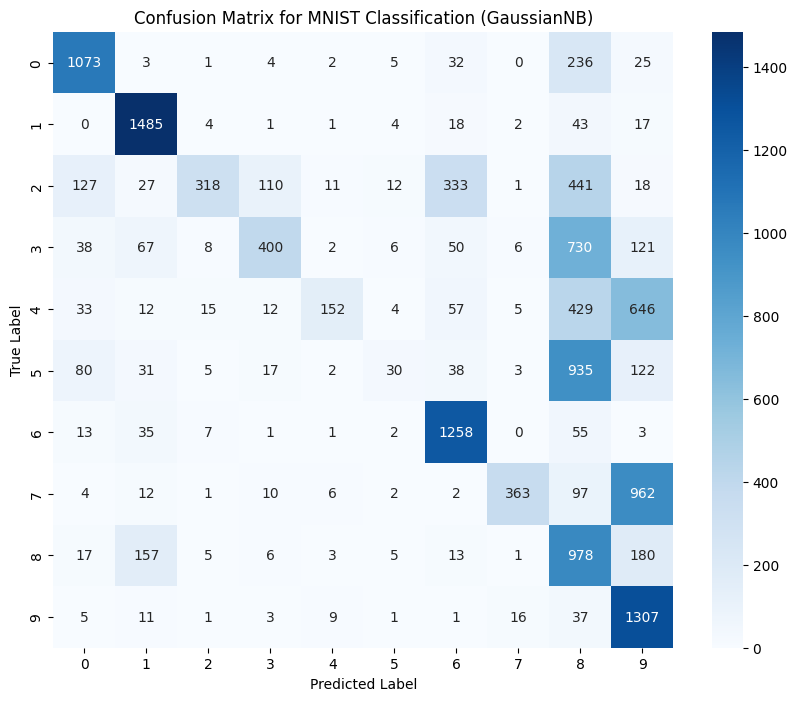

In [7]:
# Block 5: Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MNIST Classification (GaussianNB)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()